In [1]:
import nltk

In [2]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/edmund/nltk_data...


True

In [3]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [4]:
sentiment_analyzer = SentimentIntensityAnalyzer()
sentiment_sentence = "I HATE my school!"
sentiment_analyzer.polarity_scores(sentiment_sentence)

{'neg': 0.703, 'neu': 0.297, 'pos': 0.0, 'compound': -0.6932}

In [5]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline

In [6]:
sentences = pd.read_csv('./data/social_media_sample_file.csv')
len(sentences)

10

In [7]:
sentences.head()

,id,text
0,1,I Hate my School!!!
1,2,@socialmediahandle I learned something new today
2,3,I need to take a cool trip to Austraila!
3,4,The restaurant service was amazing!
4,5,I will never go back there again!


In [9]:
i=0
score_compound = []
score_pos = []
score_neg = []
score_neu = []

while(i < len(sentences)):
    tmp = sentiment_analyzer.polarity_scores(sentences.iloc[i]['text'])
    score_compound.append(tmp['compound'])
    score_pos.append(tmp['pos'])
    score_neg.append(tmp['neg'])
    score_neu.append(tmp['neu'])
    i = i + 1

In [12]:
score_compound = np.array(score_compound)
score_pos = np.array(score_pos)
score_neg = np.array(score_neg)
score_neu = np.array(score_neu)

In [13]:
sentences['compound'] = score_compound
sentences['positive'] = score_pos
sentences['negative'] = score_neg
sentences['neutral'] = score_neu
sentences.head()

,id,text,compound,positive,negative,neutral
0,1,I Hate my School!!!,-0.6784,0.000,0.696,0.304
1,2,@socialmediahandle I learned something new today,0.0000,0.000,0.000,1.000
2,3,I need to take a cool trip to Austraila!,0.3802,0.302,0.000,0.698
3,4,The restaurant service was amazing!,0.6239,0.506,0.000,0.494
4,5,I will never go back there again!,0.0000,0.000,0.000,1.000


In [14]:
i=0
pred = []

while(i < len(sentences)):
    if((sentences.iloc[i]['compound']) >= 0.3):
        pred.append('positive')
    elif((sentences.iloc[i]['compound'] >= 0) &
        (sentences.iloc[i]['compound'] < 0.3)):
        pred.append('neutral')
    elif((sentences.iloc[i]['compound'] < 0)):
        pred.append('negative')
    i = i + 1

In [16]:
sentences['predicted'] = pred
sentences.head()

,id,text,compound,positive,negative,neutral,predicted
0,1,I Hate my School!!!,-0.6784,0.000,0.696,0.304,negative
1,2,@socialmediahandle I learned something new today,0.0000,0.000,0.000,1.000,neutral
2,3,I need to take a cool trip to Austraila!,0.3802,0.302,0.000,0.698,positive
3,4,The restaurant service was amazing!,0.6239,0.506,0.000,0.494,positive
4,5,I will never go back there again!,0.0000,0.000,0.000,1.000,neutral


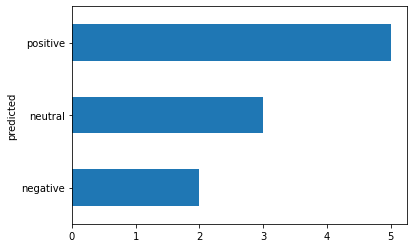

In [17]:
sentences.groupby('predicted').size().plot(kind='barh')